In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df= pd.read_csv('Titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [142]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [143]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [144]:
# Note the train test split must be done before the Imputaion so that there are no data leaks
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state= 2 )

In [145]:
# Now as we will impute this with pandas using the mean(),median() method one by one for both the Age and Fare columns.
age_mean = X_train['Age'].mean()
age_median = X_train['Age'].median()

fare_mean = X_train['Fare'].mean()
fare_median = X_train['Fare'].median()

In [146]:
# Now we will create new columns for each to verify the results before and after the Imputation method 
# First we will do the pandas method , at the end we will do the Column Transformer method using Simple Imputer

X_train['Age_mean'] = X_train['Age'].fillna(age_mean)
X_train['Age_median'] = X_train['Age'].fillna(age_median)

X_train['Fare_mean'] = X_train['Fare'].fillna(fare_mean)
X_train['Fare_median'] = X_train['Fare'].fillna(fare_median)

In [147]:
X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [148]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [149]:
X_train.var()

Age             204.349513
Fare           2448.197914
Family            2.735252
Age_mean        161.812625
Age_median      161.989566
Fare_mean      2324.238526
Fare_median    2340.091022
dtype: float64

[]

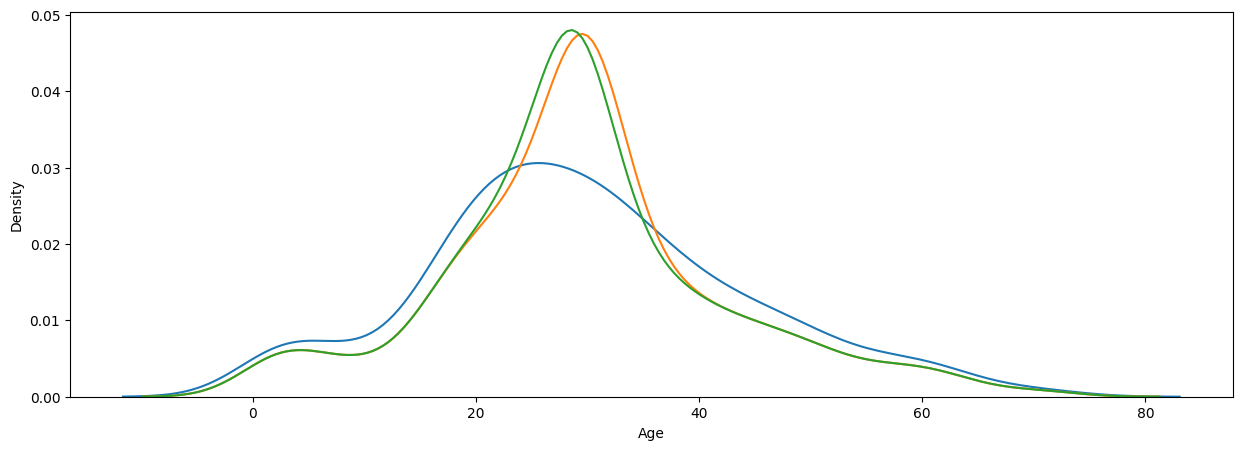

In [150]:
# We check the distribution , the variance and the density , and choose which Impute is the best for our dataset.
# There is a lot of difference in mean and median in the density plot , so here we have to Analyze and choose suc
plt.figure(figsize=(15,5))
sns.kdeplot(data=X_train['Age'])
sns.kdeplot(data=X_train['Age_mean'])
sns.kdeplot(data=X_train['Age_median'])
plt.plot()

[]

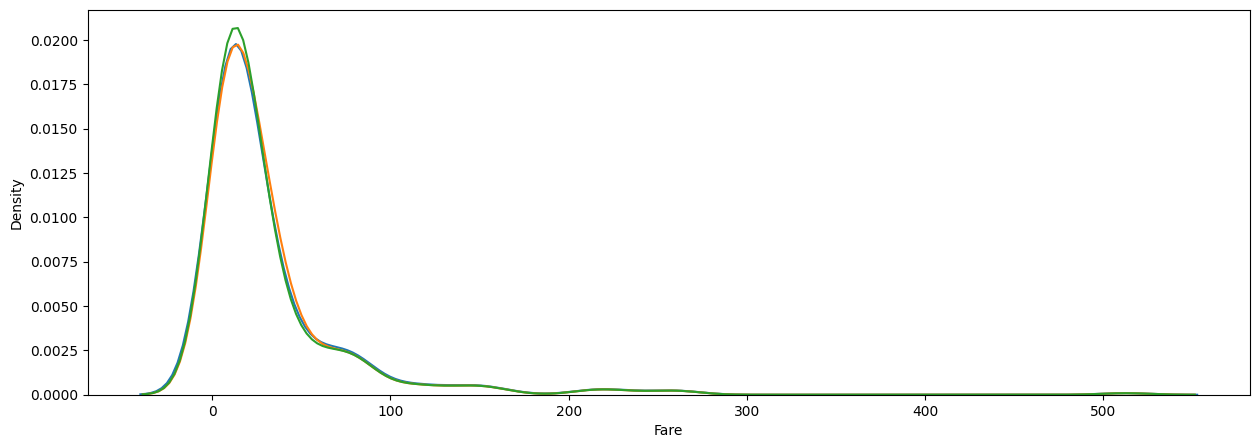

In [151]:
# As we can say here the Fare mean and median can both be used for Imputation as it barely effects the Distribution .
plt.figure(figsize=(15,5))
sns.kdeplot(data=X_train['Fare'])
sns.kdeplot(data=X_train['Fare_mean'])
sns.kdeplot(data=X_train['Fare_median'])
plt.plot()

<Axes: >

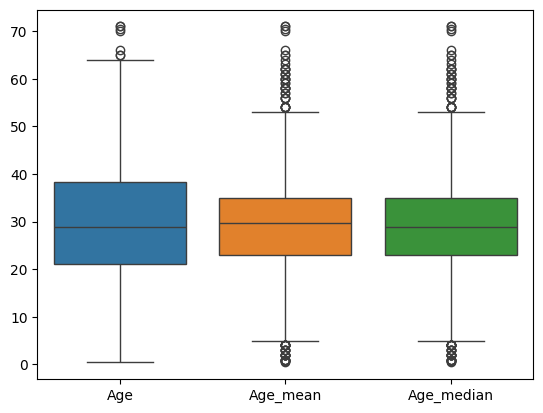

In [152]:
# We select the values which is the closest to the original distribution and whose covariance is closer to the original covariance.
# Now lets look at the outliers here for both the columns using boxplot

sns.boxplot(data=X_train[['Age','Age_mean','Age_median']])

<Axes: >

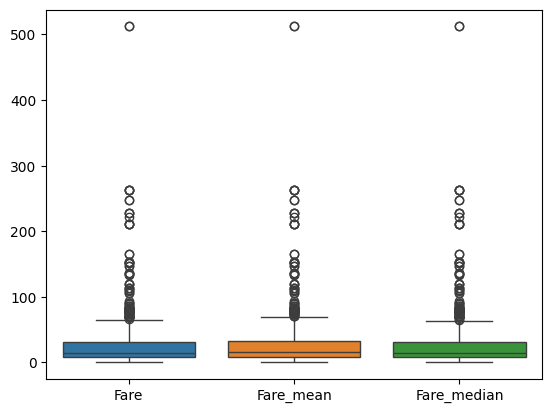

In [153]:
sns.boxplot(data=X_train[['Fare','Fare_mean','Fare_median']])

In [159]:
# Now using Simple imputer in Column transformer
# We can do the traditional fitting of the Simple Imputer and then tranform the columns , but as we know the Column Transformer , it will reduce the work load

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

trf1 = ColumnTransformer(
        transformers= [
            ( 'imputer_mean' , SimpleImputer(strategy='mean') , ['Age','Fare'] ) ,
            ( 'imputer_median' , SimpleImputer(strategy='median') , ['Age','Fare'] )
        ] ,
        remainder='passthrough'
)

In [160]:
trf1.fit(X_train)

,transformers,"[('imputer_mean', ...), ('imputer_median', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [161]:
# Accessing the transformer values and trasnformation steps .
trf1.named_transformers_['imputer_mean']
trf1.named_transformers_['imputer_mean'].statistics_

array([29.78590426, 32.61759689])

In [162]:
X_train = trf1.transform(X_train)
X_test = trf1.transform(X_test)

In [164]:
X_train,X_test

(array([[ 40.        ,  27.7208    ,  40.        ,  27.7208    ,
           0.        ],
        [  4.        ,  16.7       ,   4.        ,  16.7       ,
           2.        ],
        [ 47.        ,   9.        ,  47.        ,   9.        ,
           0.        ],
        ...,
        [ 71.        ,  49.5042    ,  71.        ,  49.5042    ,
           0.        ],
        [ 29.78590426, 221.7792    ,  28.75      , 221.7792    ,
           0.        ],
        [ 29.78590426,  25.925     ,  28.75      ,  25.925     ,
           0.        ]], shape=(712, 5)),
 array([[ 42.        ,  26.2875    ,  42.        ,  26.2875    ,
           0.        ],
        [ 21.        ,   8.05      ,  21.        ,   8.05      ,
           0.        ],
        [ 24.        ,  65.        ,  24.        ,  65.        ,
           3.        ],
        [ 28.        ,  56.4958    ,  28.        ,  56.4958    ,
           0.        ],
        [ 17.        ,   7.925     ,  17.        ,   7.925     ,
           6. 